In [55]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [69]:
zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.json')
print(zone.crs)
zones.head( )

epsg:4326


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,None
1,2,2,7.670585e+07,45226.018917,None
2,3,3,2.985488e+08,75207.067487,None
3,4,4,2.713638e+08,74348.596054,None
4,5,5,3.928178e+08,106661.712102,None


In [42]:
type(zones)

geopandas.geodataframe.GeoDataFrame

In [44]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


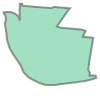

In [45]:
zones.loc[0, 'geometry']

In [14]:
print(zones.loc[0, 'geometry'])

POLYGON ((1743366.812291667 678044.5425000042, 1743367.697500005 678044.5356249958, 1743447.46541667 678056.6558333337, 1743491.095833331 678089.0802083313, 1743559.364166662 678140.2435416728, 1743611.48041667 678163.5006249994, 1743695.287708327 678201.801458329, 1743777.13729167 678216.0904166698, 1743798.416250005 678220.2931250036, 1743904.743125007 678194.710833326, 1743994.282291666 678173.2637500018, 1744019.93020834 678170.1518750042, 1744101.891249999 678160.7779166698, 1744158.493125007 678153.7852083296, 1744197.998333335 678149.1095833331, 1744293.813541666 678137.8081250042, 1744328.00729166 678133.1743749976, 1744338.916458338 678131.9975000024, 1744384.317291662 678126.5483333319, 1744405.834583327 678123.4689583331, 1744469.799374998 678114.5995833278, 1744491.02458334 678111.8866666704, 1744570.04354167 678103.6283333302, 1744590.093958333 678101.6527083367, 1744689.458749995 678091.4170833379, 1744787.646041662 678081.5554166734, 1744806.811458334 678079.5864583403, 

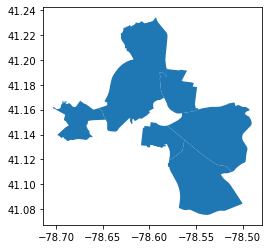

In [46]:
zones.plot();

TypeError: __init__() got an unexpected keyword argument 'title'

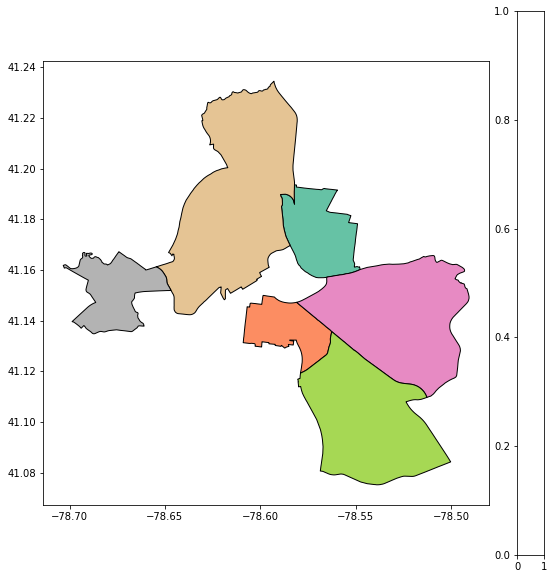

In [47]:
leg_kwds = {'title': 'Promise Zones', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zones.plot(column = 'ZONE_ID', figsize=(10, 10),
              edgecolor = 'black', ##polygon outline
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')##color map..see link above
plt.show()

In [48]:
zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
zones.geometry.centroid

C:\Users\jojuk\AppData\Local\Temp/ipykernel_19244/3668247504.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones.geometry.centroid


0    POINT (-78.56920 41.17446)
1    POINT (-78.58585 41.13666)
2    POINT (-78.52802 41.14093)
3    POINT (-78.54382 41.10091)
4    POINT (-78.61285 41.18771)
5    POINT (-78.67593 41.15125)
dtype: geometry

In [50]:
center = zones.geometry.centroid
print(center)

0    POINT (-78.56920 41.17446)
1    POINT (-78.58585 41.13666)
2    POINT (-78.52802 41.14093)
3    POINT (-78.54382 41.10091)
4    POINT (-78.61285 41.18771)
5    POINT (-78.67593 41.15125)
dtype: geometry


C:\Users\jojuk\AppData\Local\Temp/ipykernel_19244/2487087119.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zones.geometry.centroid


In [65]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[0    41.174457
1    41.136658
2    41.140933
3    41.100905
4    41.187705
5    41.151252
dtype: float64, 0   -78.569196
1   -78.585846
2   -78.528021
3   -78.543821
4   -78.612851
5   -78.675926
dtype: float64]


In [68]:
map_zones = folium.Map(location=[41.136658, -78.585846], zoom_start = 12)

for index, row_values in zones.iterrows():
    point = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

SyntaxError: invalid syntax (Temp/ipykernel_19244/16972584.py, line 4)